[[10.5, 9.0], [10.56717, 9.268445], [8.27532, 11.38221], [8.227458, 11.37764], [8.179511, 11.37211], [8.1315, 11.36561], [8.083443, 11.35814], [8.035361, 11.3497], [7.98727, 11.34027], [7.9392, 11.32987], [7.89116, 11.31848], [7.84317, 11.30611], [10.57166, 9.29981], [7.79526, 11.29275], [7.74744, 11.2784], [7.69974, 11.26305], [7.65217, 11.24672], [7.60476, 11.22939], [7.55752, 11.21107], [7.51048, 11.19176], [7.46366, 11.17146], [7.41707, 11.15017], [7.37075, 11.12789], [10.57552, 9.331439], [7.3247, 11.10463], [7.27896, 11.08039], [7.23353, 11.05516], [7.18845, 11.02896], [7.14373, 11.00179], [7.09939, 10.97365], [7.05546, 10.94454], [7.01195, 10.91448], [6.96888, 10.88347], [6.92628, 10.85151], [10.57873, 9.363319], [6.88417, 10.81862], [6.84256, 10.78479], [6.80148, 10.75003], [6.76095, 10.71436], [6.72098, 10.67778], [6.6816, 10.64031], [6.64282, 10.60194], [6.60467, 10.56269], [6.56716, 10.52257], [6.53032, 10.48159], [10.58131, 9.395437], [6.49417, 10.43975], [6.45871, 10.39709

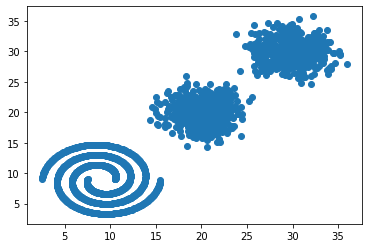

In [1]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

# 1 Jeu de données

# Charge le jeu de donnée
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]

# Transforme le jeu de donnée en un type utilisable plus facilement
xaxis = []
yaxis = []
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
    xaxis.append(data[i][0])
    yaxis.append(data[i][1])

# Print les données
print(liste) 

# Plot les données sur un graphe
plt.scatter(xaxis, yaxis)

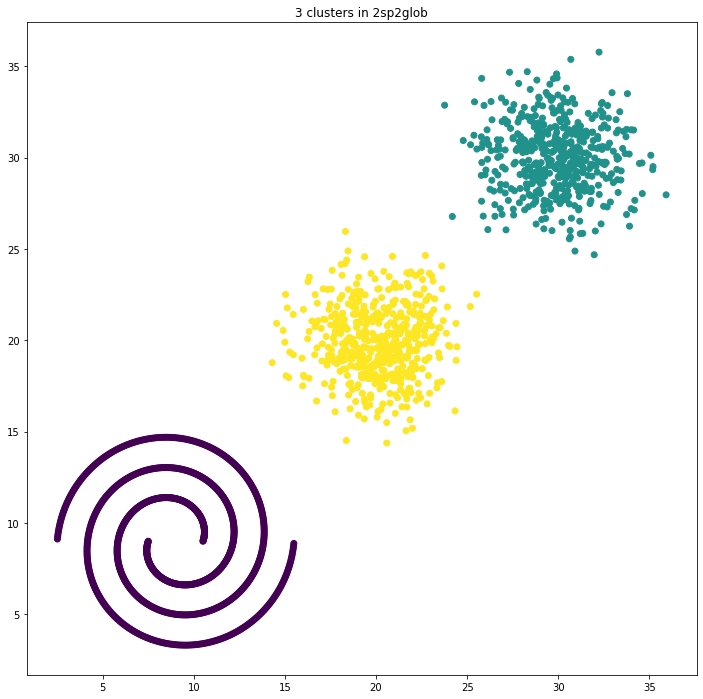

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 2 Clustering k-means

# Charge le jeu de donnée : 2sp2glob
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour n=3
pred = KMeans(n_clusters=3, random_state=0).fit_predict(npliste)

# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("3 clusters in 2sp2glob")
plt.show()


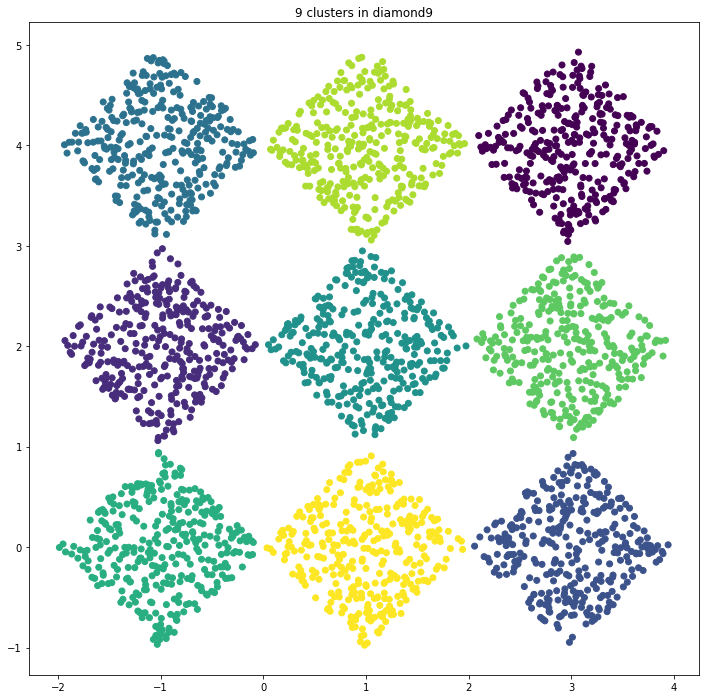

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 2 Clustering k-means (suite)

# Charge le jeu de donnée : diamond9
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour n=9
pred = KMeans(n_clusters=9, random_state=0).fit_predict(npliste)

# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("9 clusters in diamond9")
plt.show()


Mesures : [0.3518107901463774, 0.38789474031923604, 0.3931402610788552, 0.4145170726979948, 0.4133331641849272, 0.46588978118120233, 0.5003835962196275, 0.5487609071066126, 0.5221451410830945, 0.49331204712236226, 0.4717058611870848]
Temps : [0.06479191780090332, 0.06533670425415039, 0.10770869255065918, 0.1107020378112793, 0.14162015914916992, 0.12566518783569336, 0.12765860557556152, 0.10162854194641113, 0.15854597091674805, 0.18051743507385254, 0.2014610767364502]
Clusters :  9


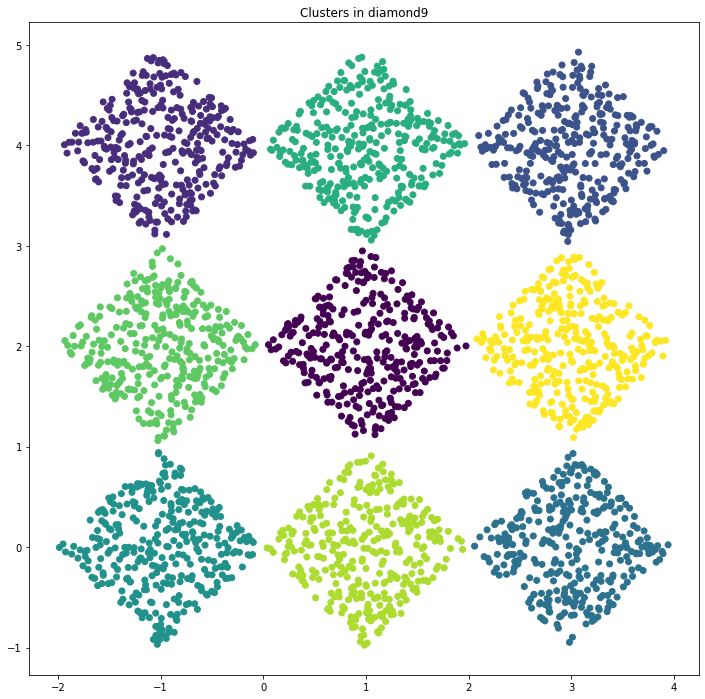

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

# Charge le jeu de donnée : diamond9
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",mesures)
print("Temps :",temps)

# Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster)

# Calcul les clusters pour le nombre maximisant le Silhouette-Score
pred = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(npliste)
# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in diamond9")
plt.show()

Mesures : [0.6614755677743188, 0.6959623087142756, 0.5463452812235728, 0.5562326606232584, 0.5557132003961633, 0.4485180880207061, 0.35809748242549444, 0.3423592998458644, 0.35148285480675123, 0.35655556764382806, 0.34982801654203866]
Temps : [0.03989410400390625, 0.0299222469329834, 0.11170125007629395, 0.0638284683227539, 0.10384893417358398, 0.12644267082214355, 0.1335742473602295, 0.1186830997467041, 0.15680170059204102, 0.15658068656921387, 0.18052029609680176]
Clusters :  3


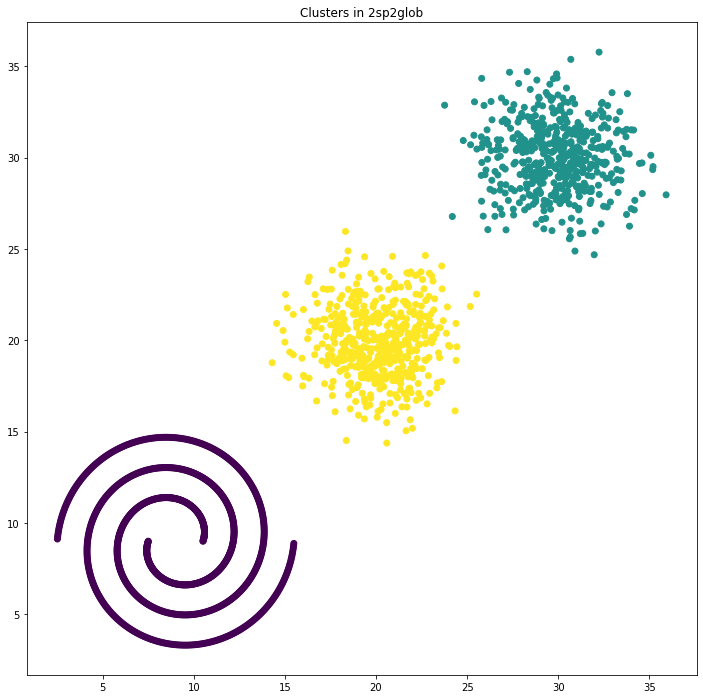

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

# Charge le jeu de donnée : 2sp2glob
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",mesures)
print("Temps :",temps)

# Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster)

# Calcul les clusters pour le nombre maximisant le Silhouette-Score
pred = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(npliste)
# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in 2sp2glob")
plt.show()

Mesures : [0.4645176710141286, 0.45433486116760763, 0.4622528491068144, 0.4761982714793874, 0.5053913183123184, 0.5017891958778578, 0.5218104279836476, 0.5211904861295221, 0.5200264563848813, 0.5175759030700723, 0.5116801970054228]
Temps : [0.05781054496765137, 0.10868144035339355, 0.1186833381652832, 0.11916303634643555, 0.15059781074523926, 0.1723003387451172, 0.16755056381225586, 0.15555119514465332, 0.19671320915222168, 0.20986342430114746, 0.20569658279418945]
Clusters :  8


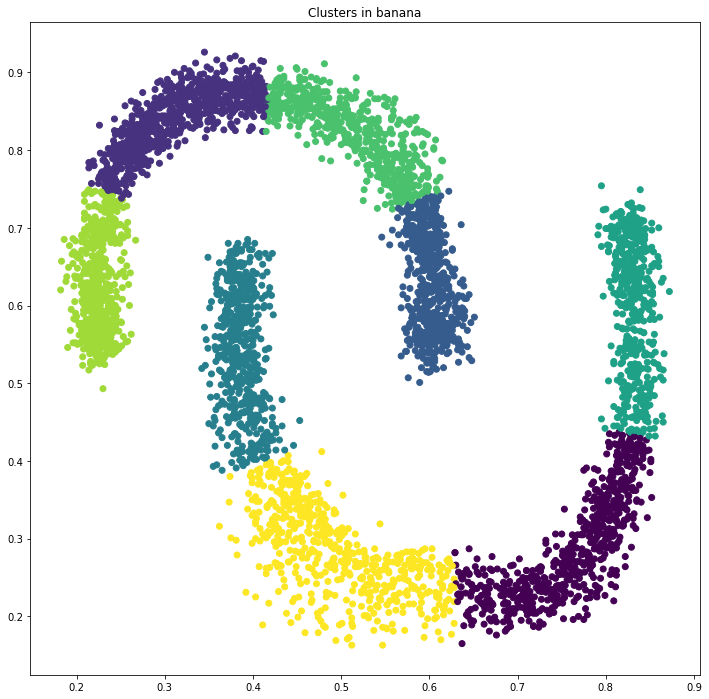

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

# Charge le jeu de donnée : banana
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/banana.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",mesures)
print("Temps :",temps)

# Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster)

# Calcul les clusters pour le nombre maximisant le Silhouette-Score
pred = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(npliste)
# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in banana")
plt.show()

Mesures : [0.48844811069666827, 0.5353880315412627, 0.5942546828244222, 0.6349775464938121, 0.6464329467851837, 0.6494205053905422, 0.6419923408531159, 0.636739406240634, 0.3424234034755847, 0.35743010939558567, 0.5369904214820488]
Temps : [0.031914710998535156, 0.05385589599609375, 0.058843135833740234, 0.0767970085144043, 0.06582307815551758, 0.09873557090759277, 0.08078384399414062, 0.11170458793640137, 0.11073136329650879, 0.11369776725769043, 0.12766242027282715]
Clusters :  7


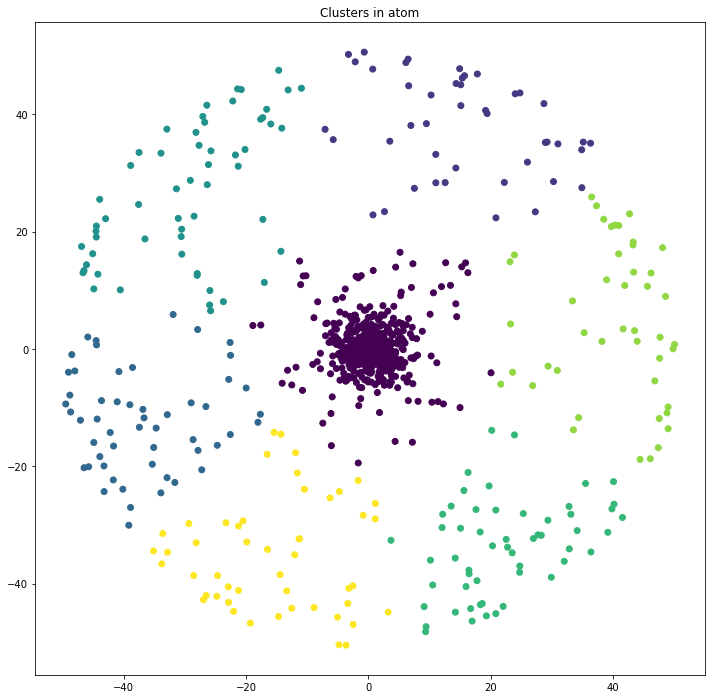

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

# Charge le jeu de donnée : atom
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/atom.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",mesures)
print("Temps :",temps)

# Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster)

# Calcul les clusters pour le nombre maximisant le Silhouette-Score
pred = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(npliste)
# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in atom")
plt.show()

Mesures : [0.6120164163212516, 0.5810637833408603, 0.5070122195555214, 0.5053077102205672, 0.5517762356363312, 0.5089204668052257, 0.46896364381856637, 0.42774191937898337, 0.4065508260713208, 0.38790652234794226, 0.38035061782280094]
Temps : [0.06679058074951172, 0.07380270957946777, 0.10272622108459473, 0.10172748565673828, 0.11516904830932617, 0.15458393096923828, 0.2044525146484375, 0.17551040649414062, 0.21991634368896484, 0.23733735084533691, 0.3071780204772949]
Clusters :  2


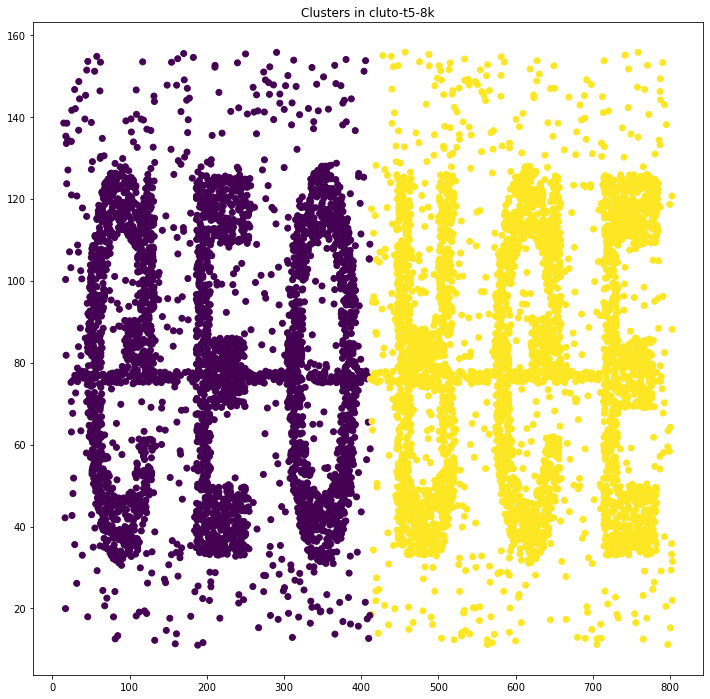

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

# Charge le jeu de donnée : cluto-t5-8k
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/cluto-t5-8k.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",mesures)
print("Temps :",temps)

# Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster)

# Calcul les clusters pour le nombre maximisant le Silhouette-Score
pred = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(npliste)
# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in cluto-t5-8k")
plt.show()

Mesures : [0.42909178188054176, 0.34921534230543316, 0.4177315721834271, 0.4418962307018588, 0.4680781472537593, 0.4888522731891721, 0.4869375649452235, 0.46938348605448843, 0.48310757897039736, 0.49027751381385143, 0.4832880833378921]
Temps : [0.036881208419799805, 0.06025052070617676, 0.07679462432861328, 0.09075665473937988, 0.11269783973693848, 0.11070489883422852, 0.1047203540802002, 0.11369609832763672, 0.1352694034576416, 0.13962793350219727, 0.11269760131835938]
Clusters :  11


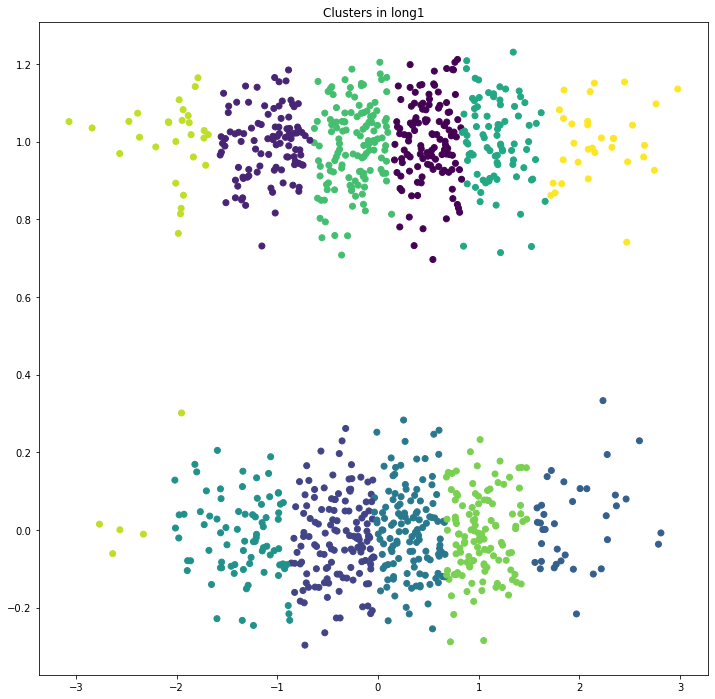

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

# Charge le jeu de donnée : long1
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/long1.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",mesures)
print("Temps :",temps)

# Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster)

# Calcul les clusters pour le nombre maximisant le Silhouette-Score
pred = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(npliste)
# Affiche le résultat de K-means
plt.figure(figsize=(12, 12))
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in long1")
plt.show()